# Series solutions near an ordinary point

Given the initial value problem,
$$
(1-2x^2)y''+(2-6x)y'-2y=0,\qquad y(0)=1,\qquad y'(0)=0.
$$

\begin{align*}
y&=\sum\limits_{n=0}^\infty a_nx^n\\
y'&=\sum\limits_{n=1}^\infty na_nx^{n-1}\\
y''&=\sum\limits_{n=2}^\infty n(n-1)a_nx^{n-2}\\
Ly&=\sum\limits_{n=2}^\infty n(n-1)a_nx^{n-2}-2\sum\limits_{n=2}^\infty n(n-1)a_nx^{n}\\
&+2\sum\limits_{n=1}^\infty na_nx^{n-1}-6\sum\limits_{n=1}^\infty na_nx^{n}\\
&-2\sum\limits_{n=0}^\infty a_nx^n\\
&=\sum\limits_{n=0}^\infty n(n-1)a_nx^{n}-2\sum\limits_{n=0}^\infty n(n-1)a_nx^{n}\\
&+2\sum\limits_{n=0}^\infty na_nx^{n}-6\sum\limits_{n=0}^\infty na_nx^{n}\\
&-2\sum\limits_{n=0}^\infty a_nx^n\\
b_n&=(n+2)(n+1)a_{n+2}-2(n+1)a_{n+1}-[2n^2-2n+6n+2]a_n\\
&=(n+2)(n+1)a_{n+2}-2(n+1)a_{n+1}-2(n+1)^2a_n
\end{align*}

$Ly=0\iff b_n=0\implies a_{n+2}=-\frac{2}{n+2}a_{n+1}+2\times\frac{n+1}{n+2}a_n$

1. Calculate the open interval of convergence for the power series for y.
\begin{align*}
1-2x^2&=0\implies x=\pm1/\sqrt{2}\\
R&=(-1\sqrt{2},1/\sqrt{2})
\end{align*}

2. Use a computer to calculate the first 30 terms $a_n$.

In [2]:
from fractions import Fraction
%matplotlib
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

Using matplotlib backend: <object object at 0x10a8328a0>


In [13]:
coefficients = [1, 0]

def recurrence(n):
    assert n >= 0
    return - Fraction(2, n+2) * coefficients[n+1] + 2 * Fraction(n+1, n+2) * coefficients[n]

def getCoefficients(indexes: list):
    indexes.sort()
    for i in range(indexes[-1]):
        coefficients.append(recurrence(i))

    for i in indexes:
        print(i, coefficients[i])

getCoefficients([x for x in range(31)])

0 1
1 0
2 1
3 -2/3
4 11/6
5 -9/5
6 329/90
7 -1301/315
8 6241/840
9 -101987/11340
10 245791/16200
11 -361189/18900
12 21093041/680400
13 -177126689/4422600
14 62205989/982800
15 -5519401193/66339000
16 137005930111/1061424000
17 -73808220739/429624000
18 42694659073117/162397872000
19 -544885792981273/1542779784000
20 5500847837119261/10285198560000
21 -2576449018723813/3560261040000
22 65096936217785851/59896156320000
23 -641395005241207069/433692539280000
24 88578868241367619967/40147537921920000
25 -623236894070636804521/206641739304000000
26 136240867651461662903113/30445216257456000000
27 -7570960989614143146264671/1233031258426968000000
28 239190755945740980184597/26375000180256000000
29 -297558767399545865225387597/23838604329588048000000
30 39402165219716121922043341981/2145474389662924320000000


3. Plot $y_N$ for various values of $N$, from 0 to 30

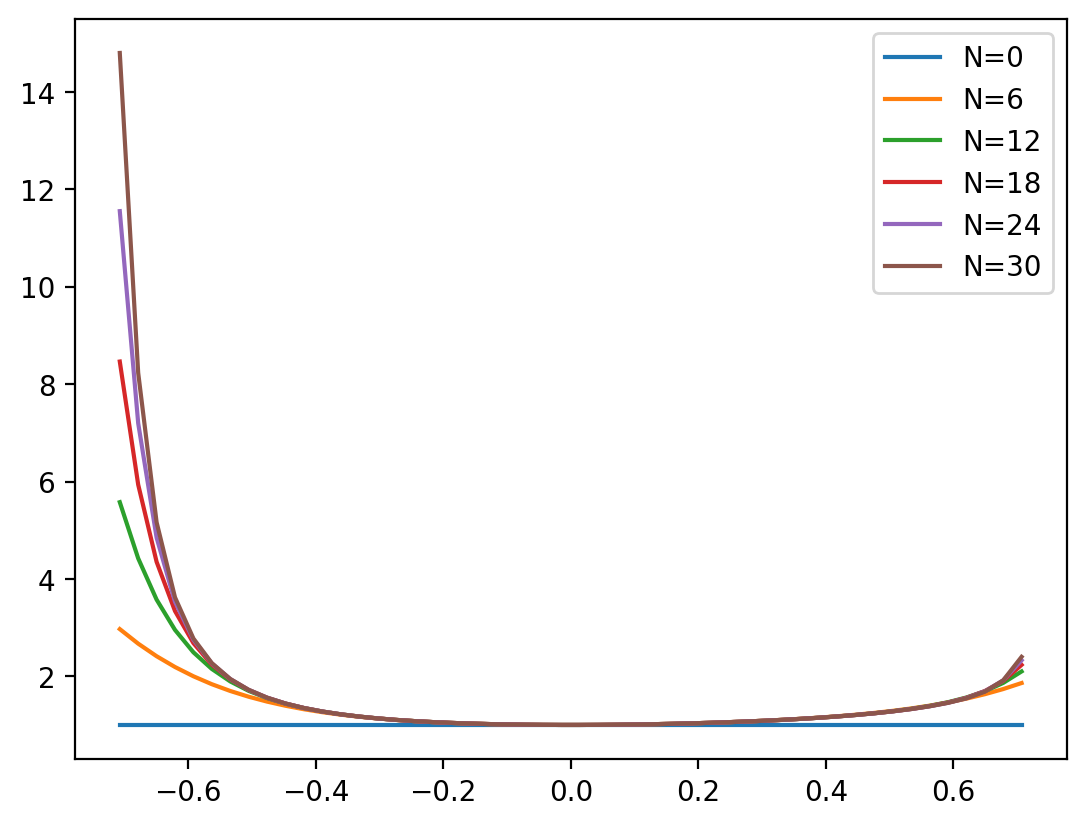

In [17]:
def series(x, N=0):
    return sum(
        [coefficients[i] * (x**i) for i in range(N+1)]
    )

x = np.linspace(-1/sqrt(2), 1/sqrt(2), 50)
fig = plt.figure()
for i in range(0, 31, 6):
    plt.plot(x, series(x, i), '-', label=f'N={i}')
plt.legend()
fig